In [96]:
# This first set of packages include Pandas, for data manipulation, numpy for mathematical computation and matplotlib & seaborn, for visualisation.
import pandas as pd
import numpy as np
from IPython.display import display
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set(style='white', context='notebook', palette='deep')
print('Data Manipulation, Mathematical Computation and Visualisation packages imported!')

# Statistical packages used for transformations
from scipy import stats
from scipy.stats import skew, norm
from scipy.special import boxcox1p
from scipy.stats.stats import pearsonr
print('Statistical packages imported!')

# Metrics used for measuring the accuracy and performance of the models
#from sklearn import metrics
#from sklearn.metrics import mean_squared_error
print('Metrics packages imported!')

# Algorithms used for modeling
from sklearn.linear_model import ElasticNet, Lasso,  BayesianRidge, LassoLarsIC
from sklearn.ensemble import RandomForestRegressor,  GradientBoostingRegressor, ExtraTreesRegressor
from sklearn.kernel_ridge import KernelRidge
import xgboost as xgb
print('Algorithm packages imported!')

# Pipeline and scaling preprocessing will be used for models that are sensitive
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import SelectFromModel
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
print('Pipeline and preprocessing packages imported!')

# Model selection packages used for sampling dataset and optimising parameters
from sklearn import model_selection
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import ShuffleSplit
print('Model selection packages imported!')

# Set visualisation colours
mycols = ["#66c2ff", "#5cd6d6", "#00cc99", "#85e085", "#ffd966", "#ffb366", "#ffb3b3", "#dab3ff", "#c2c2d6"]
sns.set_palette(palette = mycols, n_colors = 4)
print('My colours are ready! :)')

# To ignore annoying warning
import warnings
def ignore_warn(*args, **kwargs):
    pass
warnings.warn = ignore_warn #ignore annoying warning (from sklearn and seaborn)
warnings.filterwarnings("ignore", category=DeprecationWarning)
print('Deprecation warning will be ignored!')

Data Manipulation, Mathematical Computation and Visualisation packages imported!
Statistical packages imported!
Metrics packages imported!
Algorithm packages imported!
Pipeline and preprocessing packages imported!
Model selection packages imported!
My colours are ready! :)
Deprecation warning will be ignored!


In [112]:
test = pd.read_csv('test.csv')
train = pd.read_csv('train.csv')
# Save the 'Id' column
train_ID = train['Id']
test_ID = test['Id']

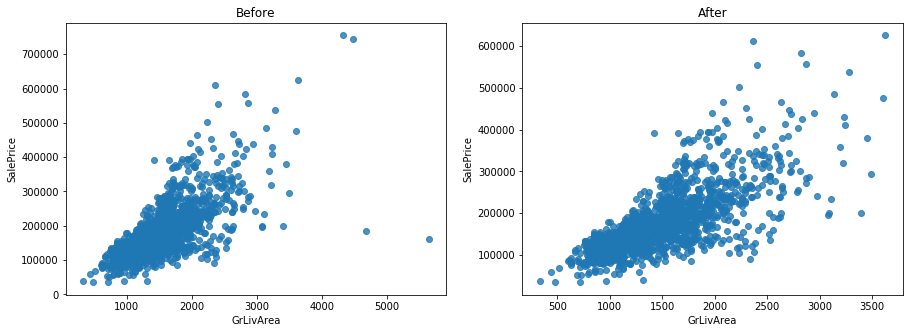

In [68]:
# remove outliers (dataset owner said > 4000 ft)
plt.subplots(figsize=(15, 5))

plt.subplot(1, 2, 1)
g = sns.regplot(x=train['GrLivArea'], y=train['SalePrice'], fit_reg=False).set_title("Before")

# Delete outliers
plt.subplot(1, 2, 2)                                                                                
train = train.drop(train[(train['GrLivArea']>4000)].index)
g = sns.regplot(x=train['GrLivArea'], y=train['SalePrice'], fit_reg=False).set_title("After")

In [69]:
df = pd.concat((train.loc[:,'MSSubClass':'SaleCondition'],
                      test.loc[:,'MSSubClass':'SaleCondition']), ignore_index=True)

In [70]:
# Drop cols with almost all NA
df.drop('Alley', axis=1, inplace=True)
df.drop('PoolQC', axis=1, inplace=True)
df.drop('Fence', axis=1, inplace=True)
df.drop('MiscFeature', axis=1, inplace=True)

In [71]:
# If value is null change for 'None'
# then for all that are 'None', change to 0
df.loc[df.MasVnrType.isnull(), 'MasVnrType'] = 'None' # no good
df.loc[df.MasVnrType == 'None', 'MasVnrArea'] = 0
df.loc[df.LotFrontage.isnull(), 'LotFrontage'] = df.LotFrontage.median()
df.loc[df.LotArea.isnull(), 'MasVnrType'] = 0
df.loc[df.BsmtQual.isnull(), 'BsmtQual'] = 'NoBsmt'
df.loc[df.BsmtCond.isnull(), 'BsmtCond'] = 'NoBsmt'
df.loc[df.BsmtExposure.isnull(), 'BsmtExposure'] = 'NoBsmt'
df.loc[df.BsmtFinType1.isnull(), 'BsmtFinType1'] = 'NoBsmt'
df.loc[df.BsmtFinType2.isnull(), 'BsmtFinType2'] = 'NoBsmt'
df.loc[df.BsmtFinType1=='NoBsmt', 'BsmtFinSF1'] = 0
df.loc[df.BsmtFinType2=='NoBsmt', 'BsmtFinSF2'] = 0
df.loc[df.BsmtFinSF1.isnull(), 'BsmtFinSF1'] = df.BsmtFinSF1.median()
df.loc[df.BsmtQual=='NoBsmt', 'BsmtUnfSF'] = 0
df.loc[df.BsmtUnfSF.isnull(), 'BsmtUnfSF'] = df.BsmtUnfSF.median()
df.loc[df.BsmtQual=='NoBsmt', 'TotalBsmtSF'] = 0
df.loc[df.FireplaceQu.isnull(), 'FireplaceQu'] = 'NoFireplace'
df.loc[df.GarageType.isnull(), 'GarageType'] = 'NoGarage'
df.loc[df.GarageFinish.isnull(), 'GarageFinish'] = 'NoGarage'
df.loc[df.GarageQual.isnull(), 'GarageQual'] = 'NoGarage'
df.loc[df.GarageCond.isnull(), 'GarageCond'] = 'NoGarage'
df.loc[df.BsmtFullBath.isnull(), 'BsmtFullBath'] = 0
df.loc[df.BsmtHalfBath.isnull(), 'BsmtHalfBath'] = 0
df.loc[df.KitchenQual.isnull(), 'KitchenQual'] = 'TA'
df.loc[df.MSZoning.isnull(), 'MSZoning'] = 'RL'
df.loc[df.Utilities.isnull(), 'Utilities'] = 'AllPub'
df.loc[df.Exterior1st.isnull(), 'Exterior1st'] = 'VinylSd'
df.loc[df.Exterior2nd.isnull(), 'Exterior2nd'] = 'VinylSd'
df.loc[df.Functional.isnull(), 'Functional'] = 'Typ'
df.loc[df.SaleCondition.isnull(), 'SaleCondition'] = 'Normal'
df.loc[df.SaleCondition.isnull(), 'SaleType'] = 'WD'
df.loc[df['Electrical'].isnull(), 'Electrical'] = 'SBrkr'
df.loc[df['SaleType'].isnull(), 'SaleType'] = 'NoSale'
#GarageYrBlt
df.loc[df.GarageYrBlt.isnull(), 'GarageYrBlt'] = df.GarageYrBlt.median()
# only one is null and it has type Detchd
df.loc[df['GarageArea'].isnull(), 'GarageArea'] = df.loc[df['GarageType']=='Detchd', 'GarageArea'].mean()
df.loc[df['GarageCars'].isnull(), 'GarageCars'] = df.loc[df['GarageType']=='Detchd', 'GarageCars'].median()

### Check corr

In [72]:
corr = train.corr()

In [73]:
corr.columns

Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

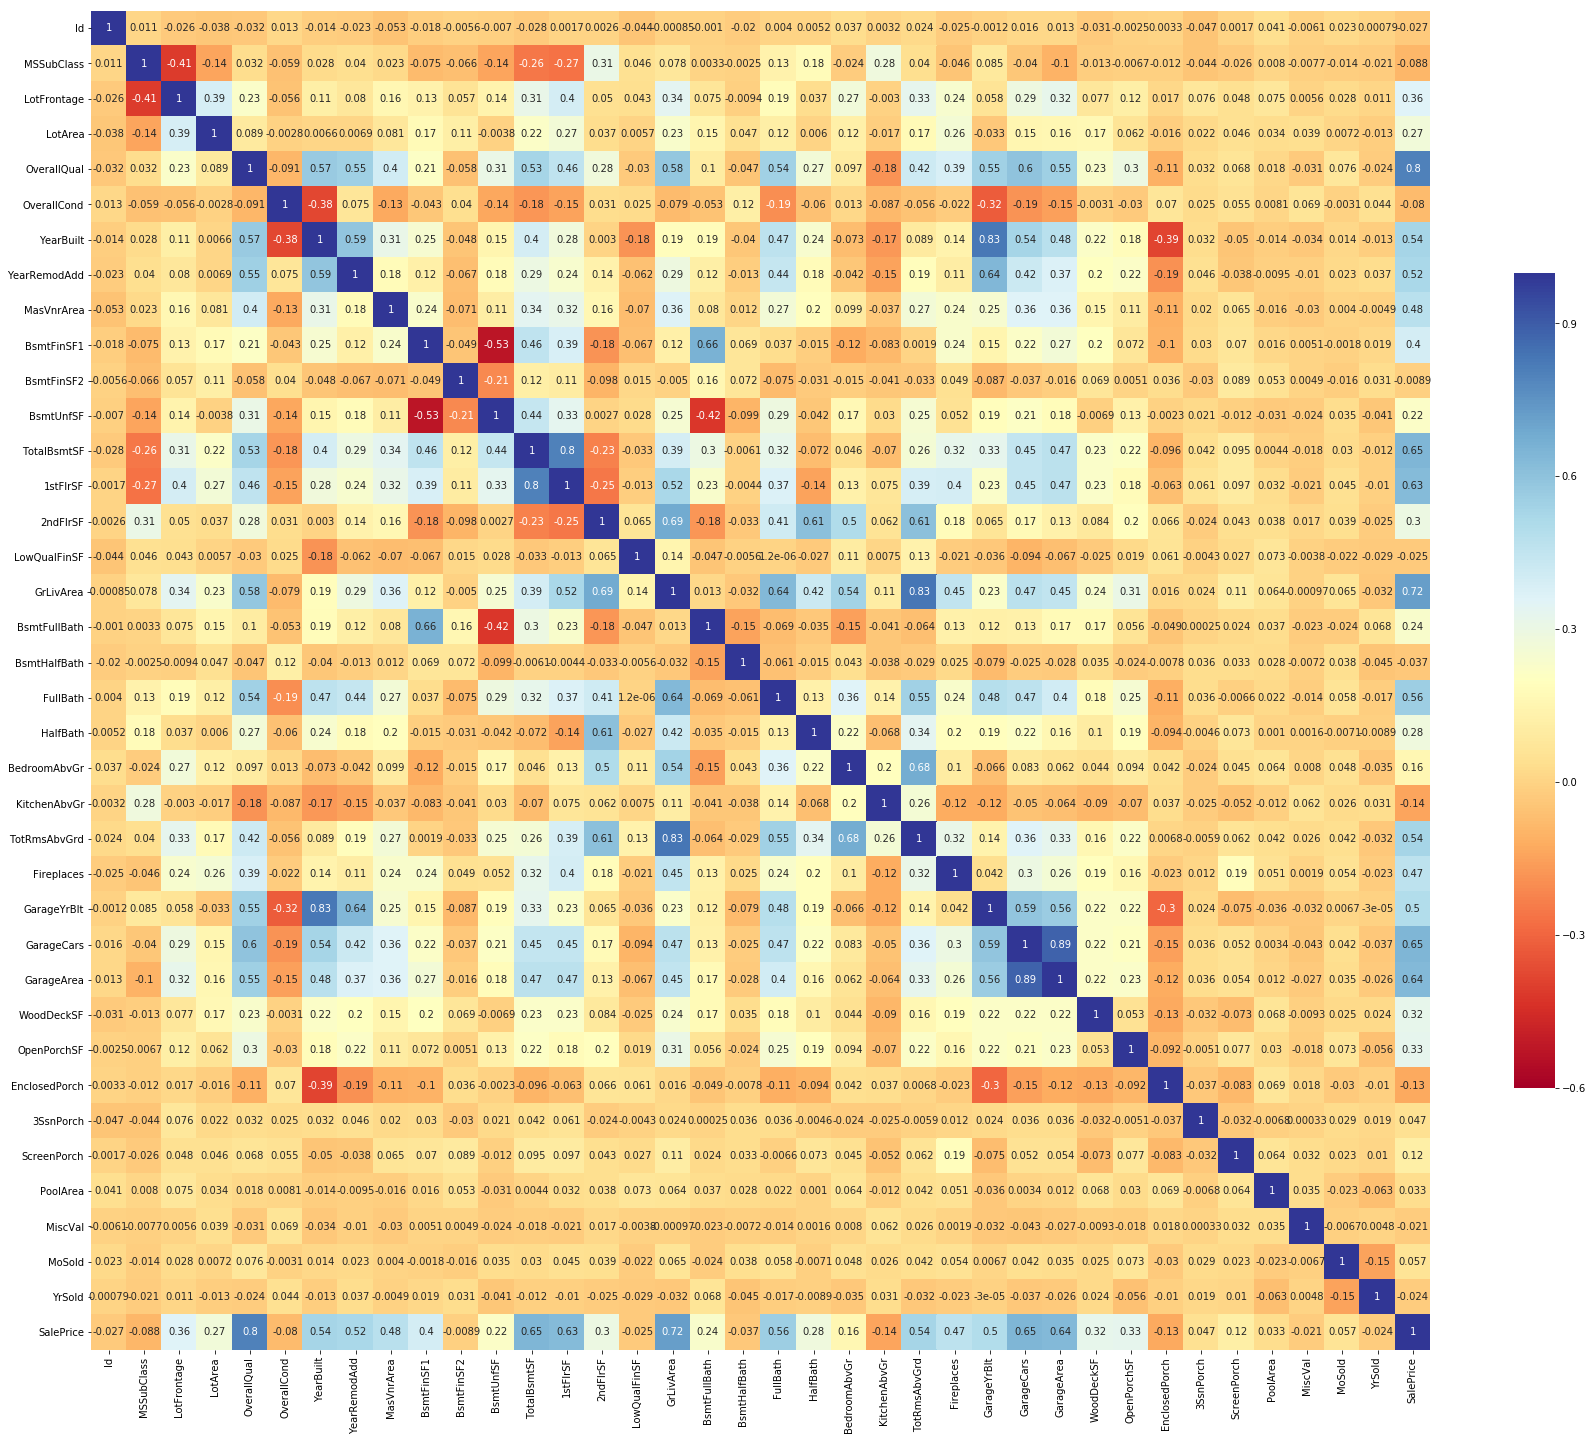

In [74]:
plt.subplots(figsize=(30, 30))
cmap = sns.diverging_palette(150, 250, as_cmap=True)
sns.heatmap(corr, cmap="RdYlBu", vmax=1, vmin=-0.6, center=0.2, square=True, linewidths=0, cbar_kws={"shrink": .5}, annot = True);

In [75]:
corr['SalePrice'].loc[corr['SalePrice'] > 0.3][:-1]

LotFrontage     0.356773
OverallQual     0.800858
YearBuilt       0.535279
YearRemodAdd    0.521428
MasVnrArea      0.478862
BsmtFinSF1      0.395923
TotalBsmtSF     0.646584
1stFlrSF        0.625235
GrLivArea       0.720516
FullBath        0.559048
TotRmsAbvGrd    0.537462
Fireplaces      0.466765
GarageYrBlt     0.499230
GarageCars      0.649256
GarageArea      0.636964
WoodDeckSF      0.322538
OpenPorchSF     0.330361
Name: SalePrice, dtype: float64

### Polynomials

Typically, you choose the model order by the number of bends you need in your line. Each increase in the exponent produces one more bend in the curved fitted line. It’s very rare to use more than a cubic term.

In [76]:
cols = list(corr['SalePrice'].loc[corr['SalePrice'] > 0.3][:-1].index)

for name in cols:
    df[name+'-quad'] = df[name] ** 2 # Make quadratic polynomial
    df[name+'-cube'] = df[name] ** 3 # Cubic
    df[name+'-root'] = np.sqrt(df[name]) # square root

### Feature engineering

In [81]:
# Just make dummies for now
df = pd.get_dummies(df)

# Y

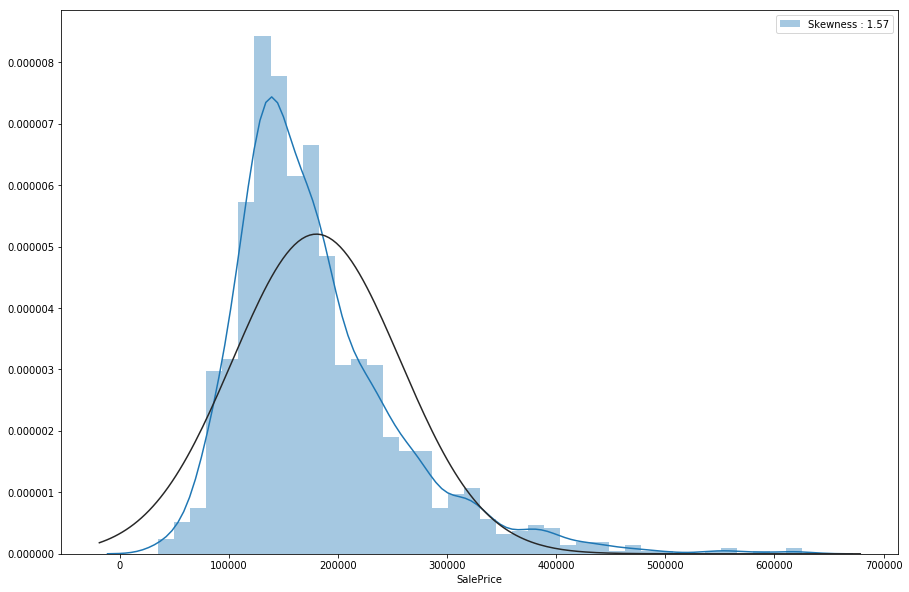

In [80]:
plt.subplots(figsize=(15, 10))
g = sns.distplot(train['SalePrice'], fit=norm, label = "Skewness : %.2f"%(train['SalePrice'].skew()));
g = g.legend(loc="best")

In [78]:
# theres a positive skew

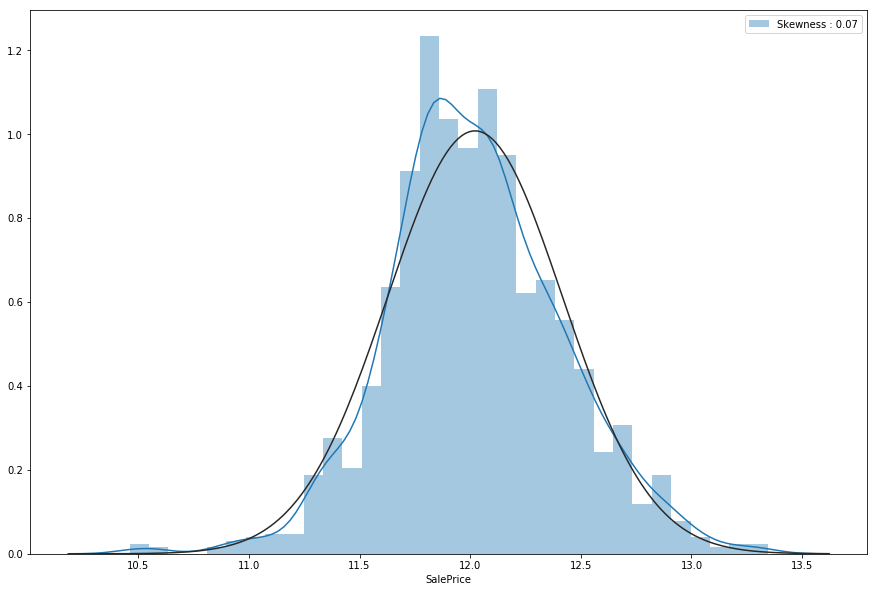

In [82]:
#We use the numpy fuction log1p which  applies log(1+x) to all elements of the column
train["SalePrice"] = np.log1p(train["SalePrice"])
y_train = train["SalePrice"]

#Check the new distribution 
plt.subplots(figsize=(15, 10))
g = sns.distplot(train['SalePrice'], fit=norm, label = "Skewness : %.2f"%(train['SalePrice'].skew()));
g = g.legend(loc="best")

### Treating skewed features
We have a variety of positive and negative skewing features. Now I will transform the features with skew > 0.5 to follow more closely the normal distribution.

Note: I am using the Box-Cox transformation to transform non-normal variables into a normal shape. Normality is an important assumption for many statistical techniques; if your data isn't normal, applying a Box-Cox means that you are able to run a broader number of tests.

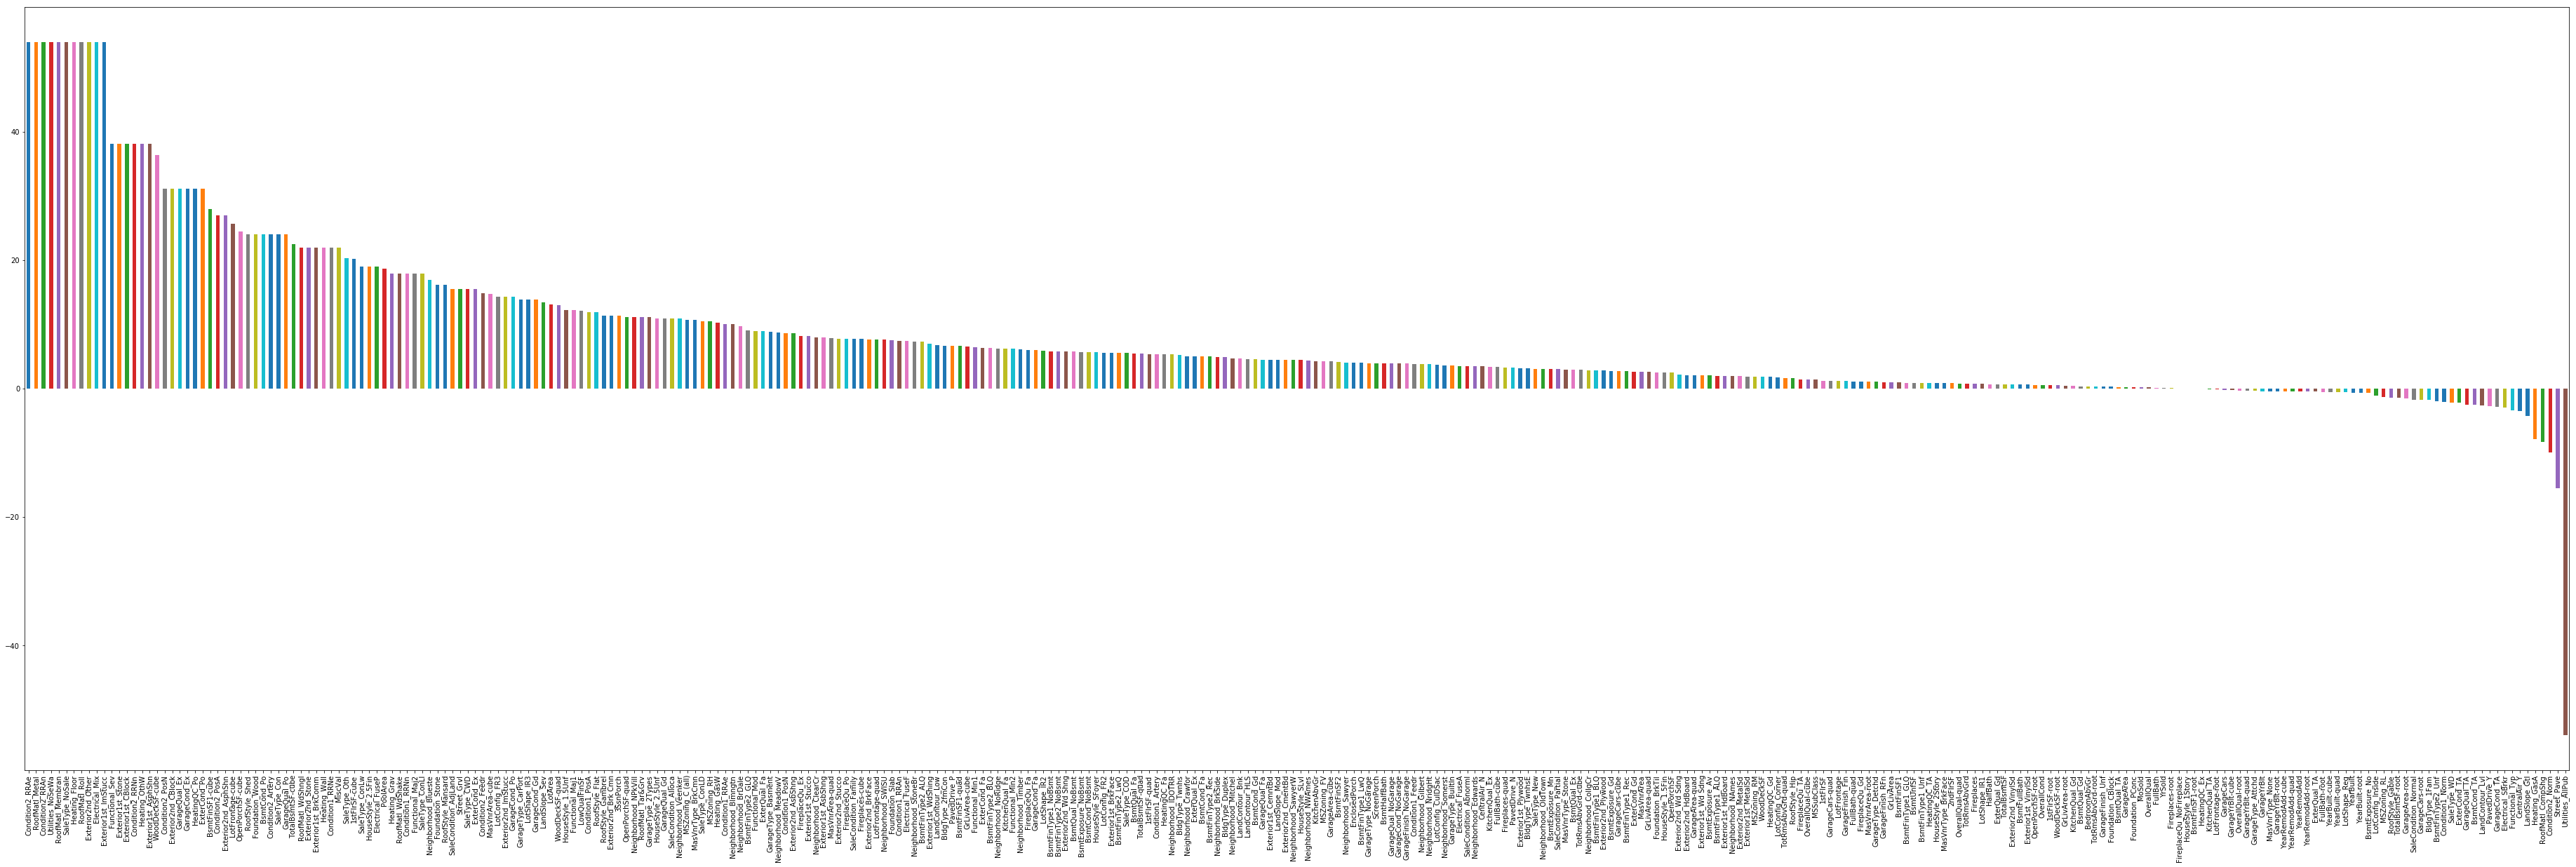

In [86]:
# First lets single out the numeric features
numeric_feats = df.dtypes[df.dtypes != "object"].index

# Check how skewed they are
skewed_feats = df[numeric_feats].apply(lambda x: skew(x.dropna())).sort_values(ascending=False)

plt.subplots(figsize =(65, 20))
skewed_feats.plot(kind='bar');

In [89]:
skewness = skewed_feats[abs(skewed_feats) > 0.5]

skewed_features = skewness.index
lam = 0.15
for feat in skewed_features:
    df[feat] = boxcox1p(df[feat], lam)

print(skewness.shape[0],  "skewed numerical features have been Box-Cox transformed")

302 skewed numerical features have been Box-Cox transformed


### Train / Test Split

In [90]:
# First, re-create the training and test datasets
train_len = train.shape[0]
train = df[:train_len]
test = df[train_len:]

print(train.shape)
print(test.shape)

(1456, 336)
(1459, 336)


### Determine best features with xgboost

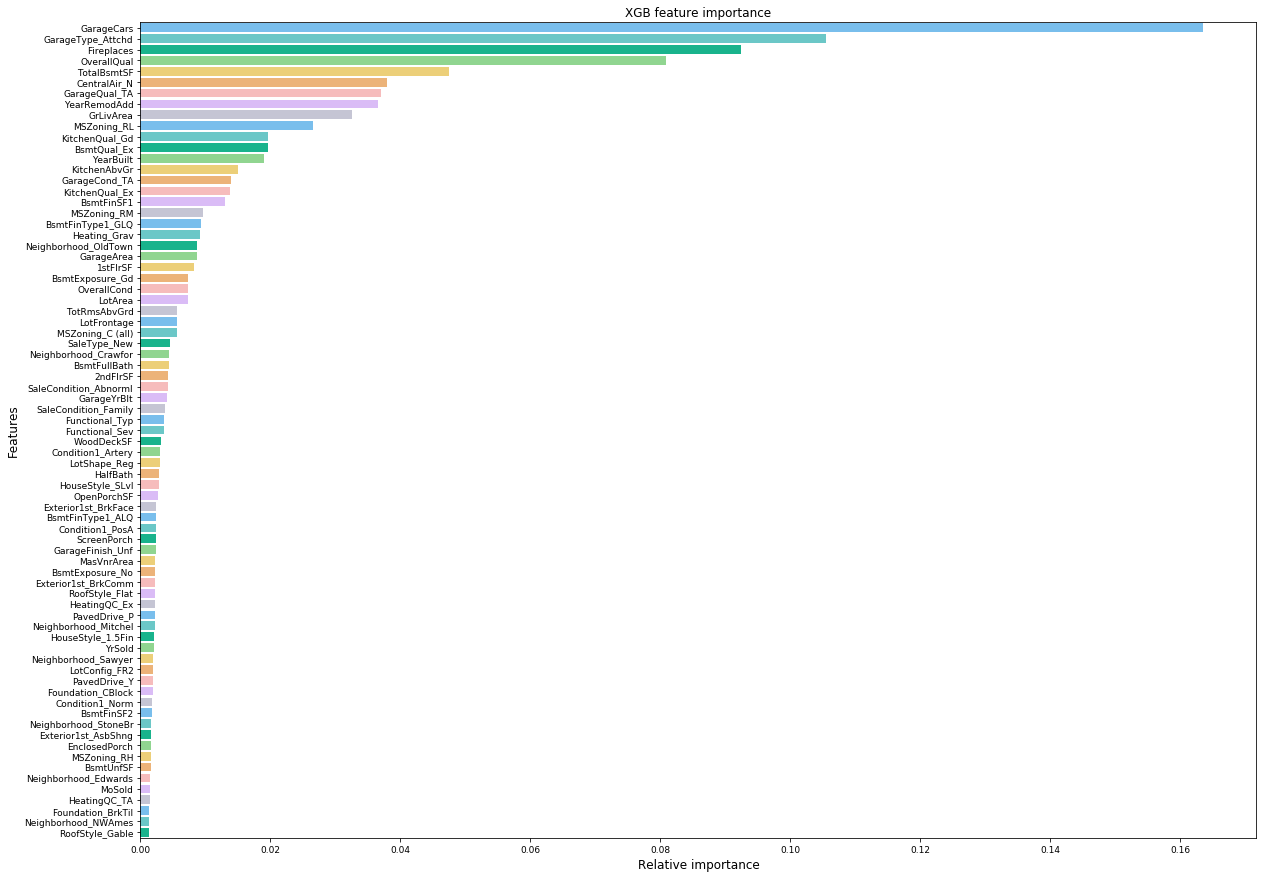

In [94]:
import xgboost as xgb

model = xgb.XGBRegressor()
model.fit(train, y_train)

# Sort feature importances from GBC model trained earlier
indices = np.argsort(model.feature_importances_)[::-1]
indices = indices[:75]

# Visualise these with a barplot
plt.subplots(figsize=(20, 15))
g = sns.barplot(y=train.columns[indices], x = model.feature_importances_[indices], orient='h', palette = mycols)
g.set_xlabel("Relative importance",fontsize=12)
g.set_ylabel("Features",fontsize=12)
g.tick_params(labelsize=9)
g.set_title("XGB feature importance");

In [97]:
xgb_train = train.copy()
xgb_test = test.copy()

import xgboost as xgb
model = xgb.XGBRegressor()
model.fit(xgb_train, y_train)

# Allow the feature importances attribute to select the most important features
xgb_feat_red = SelectFromModel(model, prefit = True)

# Reduce estimation, validation and test datasets
xgb_train = xgb_feat_red.transform(xgb_train)
xgb_test = xgb_feat_red.transform(xgb_test)


print("Results of 'feature_importances_':")
print('X_train: ', xgb_train.shape, '\nX_test: ', xgb_test.shape)

Results of 'feature_importances_':
X_train:  (1456, 41) 
X_test:  (1459, 41)


In [98]:
# Next we want to sample our training data to test for performance of robustness ans accuracy, before applying to the test data
X_train, X_test, Y_train, Y_test = model_selection.train_test_split(xgb_train, y_train, test_size=0.3, random_state=42)

print('X_train: ', X_train.shape, '\nX_test: ', X_test.shape, '\nY_train: ', Y_train.shape, '\nY_test: ', Y_test.shape)

X_train:  (1019, 41) 
X_test:  (437, 41) 
Y_train:  (1019,) 
Y_test:  (437,)


### 5.2 - Training

We are finally ready to train our models. For this analysis I am using 8 different algorithms:
- **Kernel Ridge Regression**
- **Elastic Net**
- **Lasso**
- **Gradient Boosting**
- **Bayesian Ridge**
- **Lasso Lars IC**
- **Random Forest Regressor**
- **XGBoost**

The method of measuring accuracy was chosen to be **Root Mean Squared Error**, as described within the competition.

In [100]:
import xgboost as xgb
#Machine Learning Algorithm (MLA) Selection and Initialization
models = [KernelRidge(), ElasticNet(), Lasso(), GradientBoostingRegressor(), BayesianRidge(), LassoLarsIC(), RandomForestRegressor(), xgb.XGBRegressor()]

# First I will use ShuffleSplit as a way of randomising the cross validation samples.
shuff = ShuffleSplit(n_splits=5, test_size=0.2, random_state=42)

#create table to compare MLA metrics
columns = ['Name', 'Parameters', 'Train Accuracy Mean', 'Test Accuracy']
before_model_compare = pd.DataFrame(columns = columns)

#index through models and save performance to table
row_index = 0
for alg in models:

    #set name and parameters
    model_name = alg.__class__.__name__
    before_model_compare.loc[row_index, 'Name'] = model_name
    before_model_compare.loc[row_index, 'Parameters'] = str(alg.get_params())
    
    alg.fit(X_train, Y_train)
    
    #score model with cross validation: http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_validate.html#sklearn.model_selection.cross_validate
    training_results = np.sqrt((-cross_val_score(alg, X_train, Y_train, cv = shuff, scoring= 'neg_mean_squared_error')).mean())
    test_results = np.sqrt(((Y_test-alg.predict(X_test))**2).mean())
    
    before_model_compare.loc[row_index, 'Train Accuracy Mean'] = (training_results)*100
    before_model_compare.loc[row_index, 'Test Accuracy'] = (test_results)*100
    
    row_index+=1
    print(row_index, alg.__class__.__name__, 'trained...')

decimals = 3
before_model_compare['Train Accuracy Mean'] = before_model_compare['Train Accuracy Mean'].apply(lambda x: round(x, decimals))
before_model_compare['Test Accuracy'] = before_model_compare['Test Accuracy'].apply(lambda x: round(x, decimals))
before_model_compare

1 KernelRidge trained...
2 ElasticNet trained...
3 Lasso trained...
4 GradientBoostingRegressor trained...
5 BayesianRidge trained...
6 LassoLarsIC trained...
7 RandomForestRegressor trained...
8 XGBRegressor trained...


,Name,Parameters,Train Accuracy Mean,Test Accuracy
0,KernelRidge,"{'alpha': 1, 'coef0': 1, 'degree': 3, 'gamma':...",11.511,11.749
1,ElasticNet,"{'alpha': 1.0, 'copy_X': True, 'fit_intercept'...",27.119,26.369
2,Lasso,"{'alpha': 1.0, 'copy_X': True, 'fit_intercept'...",27.505,26.687
3,GradientBoostingRegressor,"{'alpha': 0.9, 'criterion': 'friedman_mse', 'i...",12.546,12.068
4,BayesianRidge,"{'alpha_1': 1e-06, 'alpha_2': 1e-06, 'compute_...",11.535,11.763
5,LassoLarsIC,"{'copy_X': True, 'criterion': 'aic', 'eps': 2....",11.923,11.573
6,RandomForestRegressor,"{'bootstrap': True, 'criterion': 'mse', 'max_d...",14.334,15.040
7,XGBRegressor,"{'base_score': 0.5, 'booster': 'gbtree', 'cols...",12.438,12.122


### Optimisation with Grid search
(not the best values)

In [104]:
models = [KernelRidge(), ElasticNet(), Lasso(), GradientBoostingRegressor(), BayesianRidge(), LassoLarsIC(), RandomForestRegressor(), xgb.XGBRegressor()]

KR_param_grid = {'alpha': [0.01, 0.03, 0.1, 0.3, 1, 3], 'coef0': [100], 'degree': [1], 'gamma': [None], 'kernel': ['polynomial']}

EN_param_grid = {'alpha': [0.001, 0.003, 0.01, 0.03, 0.1, 0.3], 'copy_X': [True], 'l1_ratio': [0.6], 'fit_intercept': [True], 'normalize': [False], 
                         'precompute': [False], 'max_iter': [300], 'tol': [0.001], 'selection': ['random'], 'random_state': [None]}

LASS_param_grid = {'alpha': [0.0001, 0.0005, 0.001, 0.003, 0.01], 'copy_X': [True], 'fit_intercept': [True], 'normalize': [False], 'precompute': [False], 
                    'max_iter': [300], 'tol': [0.01], 'selection': ['random'], 'random_state': [None]}

GB_param_grid = {'loss': ['huber'], 'learning_rate': [0.1], 'n_estimators': [300], 'max_depth': [3], 
                                        'min_samples_split': [0.001, 0.003, 0.01, 0.03, 0.1, 0.3], 'min_samples_leaf': [5]}

BR_param_grid = {'n_iter': [200], 'tol': [0.00001], 'alpha_1': [0.00000001], 'alpha_2': [0.000005], 'lambda_1': [0.000005], 
                 'lambda_2': [0.00000001], 'copy_X': [True]}

LL_param_grid = {'criterion': ['aic'], 'normalize': [True], 'max_iter': [200], 'copy_X': [True], 'precompute': ['auto'], 'eps': [0.000001]}

RFR_param_grid = {'n_estimators': [50], 'max_features': ['auto'], 'max_depth': [None], 'min_samples_split': [5], 'min_samples_leaf': [2]}

XGB_param_grid = {'max_depth': [3], 'learning_rate': [0.1], 'n_estimators': [300], 'booster': ['gbtree'], 'gamma': [0], 'reg_alpha': [0.1],
                  'reg_lambda': [0.01, 0.03, 0.1, 0.3, 1, 3], 'max_delta_step': [0], 'min_child_weight': [1], 'colsample_bytree': [0.5], 'colsample_bylevel': [0.2],
                  'scale_pos_weight': [1]}

params_grid = [KR_param_grid, EN_param_grid, LASS_param_grid, GB_param_grid, BR_param_grid, LL_param_grid, RFR_param_grid, XGB_param_grid]

after_model_compare = pd.DataFrame(columns = columns)

row_index = 0
for alg in models:
    
    gs_alg = GridSearchCV(alg, param_grid = params_grid[0], cv = shuff, scoring = 'neg_mean_squared_error', n_jobs=-1)
    params_grid.pop(0)

    #set name and parameters
    model_name = alg.__class__.__name__
    after_model_compare.loc[row_index, 'Name'] = model_name
    
    gs_alg.fit(X_train, Y_train)
    gs_best = gs_alg.best_estimator_
    after_model_compare.loc[row_index, 'Parameters'] = str(gs_alg.best_params_)
    
    #score model with cross validation: http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_validate.html#sklearn.model_selection.cross_validate
    after_training_results = np.sqrt(-gs_alg.best_score_)
    after_test_results = np.sqrt(((Y_test-gs_alg.predict(X_test))**2).mean())
    
    after_model_compare.loc[row_index, 'Train Accuracy Mean'] = (after_training_results)*100
    after_model_compare.loc[row_index, 'Test Accuracy'] = (after_test_results)*100
    
    row_index+=1
    print(row_index, alg.__class__.__name__, 'trained...')

decimals = 3
after_model_compare['Train Accuracy Mean'] = after_model_compare['Train Accuracy Mean'].apply(lambda x: round(x, decimals))
after_model_compare['Test Accuracy'] = after_model_compare['Test Accuracy'].apply(lambda x: round(x, decimals))
after_model_compare

1 KernelRidge trained...
2 ElasticNet trained...
3 Lasso trained...
4 GradientBoostingRegressor trained...
5 BayesianRidge trained...
6 LassoLarsIC trained...
7 RandomForestRegressor trained...
8 XGBRegressor trained...


,Name,Parameters,Train Accuracy Mean,Test Accuracy
0,KernelRidge,"{'alpha': 0.01, 'coef0': 100, 'degree': 1, 'ga...",11.504,11.596
1,ElasticNet,"{'alpha': 0.001, 'copy_X': True, 'fit_intercep...",11.729,12.232
2,Lasso,"{'alpha': 0.0001, 'copy_X': True, 'fit_interce...",11.492,11.468
3,GradientBoostingRegressor,"{'learning_rate': 0.1, 'loss': 'huber', 'max_d...",11.787,11.794
4,BayesianRidge,"{'alpha_1': 1e-08, 'alpha_2': 5e-06, 'copy_X':...",11.535,11.763
5,LassoLarsIC,"{'copy_X': True, 'criterion': 'aic', 'eps': 1e...",11.923,11.573
6,RandomForestRegressor,"{'max_depth': None, 'max_features': 'auto', 'm...",13.607,14.305
7,XGBRegressor,"{'booster': 'gbtree', 'colsample_bylevel': 0.2...",11.795,11.506


### Stacking

Choose best performing model as the meta-model. All others as estimators.

Cycle through each optimised estimator, train them on the training dataset, apply to them the validation and test datasets, then finally outputting the predictions for validation and test into two new datasets: stacked_validation_train and stacked_test_train.

In [105]:
models = [KernelRidge(), ElasticNet(), Lasso(), GradientBoostingRegressor(), BayesianRidge(), LassoLarsIC(), RandomForestRegressor(), xgb.XGBRegressor()]
names = ['KernelRidge', 'ElasticNet', 'Lasso', 'Gradient Boosting', 'Bayesian Ridge', 'Lasso Lars IC', 'Random Forest', 'XGBoost']
params_grid = [KR_param_grid, EN_param_grid, LASS_param_grid, GB_param_grid, BR_param_grid, LL_param_grid, RFR_param_grid, XGB_param_grid]
stacked_validation_train = pd.DataFrame()
stacked_test_train = pd.DataFrame()

row_index=0

for alg in models:
    
    gs_alg = GridSearchCV(alg, param_grid = params_grid[0], cv = shuff, scoring = 'neg_mean_squared_error', n_jobs=-1)
    params_grid.pop(0)
    
    gs_alg.fit(X_train, Y_train)
    gs_best = gs_alg.best_estimator_
    stacked_validation_train.insert(loc = row_index, column = names[0], value = gs_best.predict(X_test))
    print(row_index+1, alg.__class__.__name__, 'predictions added to stacking validation dataset...')
    
    stacked_test_train.insert(loc = row_index, column = names[0], value = gs_best.predict(xgb_test))
    print(row_index+1, alg.__class__.__name__, 'predictions added to stacking test dataset...')
    print("-"*50)
    names.pop(0)
    
    row_index+=1
    
print('Done')

1 KernelRidge predictions added to stacking validation dataset...
1 KernelRidge predictions added to stacking test dataset...
--------------------------------------------------
2 ElasticNet predictions added to stacking validation dataset...
2 ElasticNet predictions added to stacking test dataset...
--------------------------------------------------
3 Lasso predictions added to stacking validation dataset...
3 Lasso predictions added to stacking test dataset...
--------------------------------------------------
4 GradientBoostingRegressor predictions added to stacking validation dataset...
4 GradientBoostingRegressor predictions added to stacking test dataset...
--------------------------------------------------
5 BayesianRidge predictions added to stacking validation dataset...
5 BayesianRidge predictions added to stacking test dataset...
--------------------------------------------------
6 LassoLarsIC predictions added to stacking validation dataset...
6 LassoLarsIC predictions added

In [106]:
# The new training dataset is 438 rows of predictions from the 8 algorithms we decided to use.
stacked_validation_train.head()

,KernelRidge,ElasticNet,Lasso,Gradient Boosting,Bayesian Ridge,Lasso Lars IC,Random Forest,XGBoost
0,12.019441,12.026611,12.012933,12.034342,12.024177,12.021037,12.129961,12.047866
1,11.990323,11.957624,11.987922,12.019071,11.982843,11.966282,12.059512,12.042858
2,11.860975,11.846968,11.869768,11.974010,11.853100,11.863799,11.826702,11.826777
3,11.850740,11.871540,11.843237,11.957893,11.856799,11.862074,11.888338,11.866629
4,11.275024,11.254051,11.276685,11.218886,11.269343,11.286673,11.401576,11.300570


In [107]:
# The new test dataset is 1459 rows of predictions from the 8 algorithms we decided to use.
# I will use these two datasets to train and produce predictions for the meta-model, Lasso.
stacked_test_train.head()

,KernelRidge,ElasticNet,Lasso,Gradient Boosting,Bayesian Ridge,Lasso Lars IC,Random Forest,XGBoost
0,11.741146,11.709300,11.745690,11.745599,11.730444,11.720003,11.748877,11.768077
1,12.001162,11.994776,11.998995,11.952321,12.001225,11.984028,11.993484,11.919270
2,12.113982,12.101578,12.117215,12.124380,12.110861,12.111886,12.070488,12.123621
3,12.203795,12.193401,12.207477,12.157638,12.201187,12.198934,12.118236,12.203706
4,12.092560,12.124371,12.089199,12.082367,12.100231,12.102527,12.152268,12.069567


In [109]:
# First drop the Lasso results from the table, as we will be using Lasso as the meta-model
drop = ['Lasso']
stacked_validation_train.drop(drop, axis=1, inplace=True)
stacked_test_train.drop(drop, axis=1, inplace=True)

# Now fit the meta model and generate predictions
meta_model = make_pipeline(RobustScaler(), Lasso(alpha=0.00001, copy_X = True, fit_intercept = True,
                                              normalize = False, precompute = False, max_iter = 10000,
                                              tol = 0.0001, selection = 'random', random_state = None))
meta_model.fit(stacked_validation_train, Y_test)

meta_model_pred = np.expm1(meta_model.predict(stacked_test_train))
print("Meta-model trained and applied!...")

KeyError: "['Lasso'] not found in axis"

### 5.5 - Ensemble

- However, another famous and successful technique for Machine Learning are **Ensemble methods**.
    - These are effective when using many different models of varying degrees of accuracy. 
    - They work on the idea that many weak learners, can produce a strong learner.
- Therefore, using the meta-model that I will create, I will also combine this with the results of the individual optimised models to create an ensemble.
- In order to create this ensemble, I must collect the final predictions of each of the optimised models. I will do this now.

In [110]:
models = [KernelRidge(), ElasticNet(), Lasso(), GradientBoostingRegressor(), BayesianRidge(), LassoLarsIC(), RandomForestRegressor(), xgb.XGBRegressor()]
names = ['KernelRidge', 'ElasticNet', 'Lasso', 'Gradient Boosting', 'Bayesian Ridge', 'Lasso Lars IC', 'Random Forest', 'XGBoost']
params_grid = [KR_param_grid, EN_param_grid, LASS_param_grid, GB_param_grid, BR_param_grid, LL_param_grid, RFR_param_grid, XGB_param_grid]
final_predictions = pd.DataFrame()

row_index=0

for alg in models:
    
    gs_alg = GridSearchCV(alg, param_grid = params_grid[0], cv = shuff, scoring = 'neg_mean_squared_error', n_jobs=-1)
    params_grid.pop(0)
    
    gs_alg.fit(stacked_validation_train, Y_test)
    gs_best = gs_alg.best_estimator_
    final_predictions.insert(loc = row_index, column = names[0], value = np.expm1(gs_best.predict(stacked_test_train)))
    print(row_index+1, alg.__class__.__name__, 'final results predicted added to table...')
    names.pop(0)
    
    row_index+=1

print("-"*50)
print("Done")
    
final_predictions.head()

1 KernelRidge final results predicted added to table...
2 ElasticNet final results predicted added to table...
3 Lasso final results predicted added to table...
4 GradientBoostingRegressor final results predicted added to table...
5 BayesianRidge final results predicted added to table...
6 LassoLarsIC final results predicted added to table...
7 RandomForestRegressor final results predicted added to table...
8 XGBRegressor final results predicted added to table...
--------------------------------------------------
Done


,KernelRidge,ElasticNet,Lasso,Gradient Boosting,Bayesian Ridge,Lasso Lars IC,Random Forest,XGBoost
0,127804.415665,126362.472134,127010.636463,125491.341321,127661.280748,126536.782139,124165.562110,117545.257812
1,156426.217574,156273.239378,156597.494206,151172.601315,156396.815150,156380.199550,154709.633766,155194.843750
2,184836.914947,183763.682324,184185.759825,175583.529660,184772.068124,183861.398649,174342.084206,175574.718750
3,198421.583048,197356.422623,197618.449654,198179.406955,198362.997565,197640.360328,201727.127043,205612.437500
4,174910.575943,177302.618496,176014.376679,174573.861263,175094.597328,177150.758888,170342.163543,174903.890625


- As you can see, each of the models produces results that vary quite widely. This is the beauty of using a combination of many different models.
- Some models will be much better at catching certain signals in the data, whereas others may perform better in other situations. 
- By creating an ensemble of all of these results, it helps to create a more generalised model that is resistant to noise.
- Now, I will finish by creating an ensemble of the meta-model and optimised models, for my final submission.

In [ ]:
ensemble = meta_model_pred*(1/10) + final_predictions['XGBoost']*(1.5/10) + final_predictions['Gradient Boosting']*(2/10) + final_predictions['Bayesian Ridge']*(1/10) + final_predictions['Lasso']*(1/10) + final_predictions['KernelRidge']*(1/10) + final_predictions['Lasso Lars IC']*(1/10) + final_predictions['Random Forest']*(1.5/10)

### Submission

In [118]:
submission = pd.DataFrame()
submission['Id'] = test_ID
submission['SalePrice'] = ensemble
submission.to_csv('final_submission.csv',index=False)
print("Submission file, created!")

Submission file, created!
